> ## **Métodos Computacionales II - Taller #4**

**Hecho por:** Thomas Andrade Hernández (202214695) & Juan Carlos Rojas V. (202214037)

---

In [4]:
# Zona de librerías:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import random as rnd
import math as math
import scipy as sci

**7. Numerical quantum mechanics:** Considere el siguiente problema de valores y vectores propios:

$$\frac{\text{d}^2y}{\text{d}x^2} - R(x)y = S(x),$$ 

sujeto a condiciones de frontera $y(a) = y_a$ y $y(b) = y_b$, donde $R(x)$ es una función real y $S(x)$ es un término inhomogéneo. Discretizando el dominio y expandiendo $y(x\pm h)$ hasta $\mathcal{O}(h^6)$ se obtiene: 

$$y_{n+1} -2y_n + y_{n+1} = \left( y''_n + \frac{h^2}{12}y^{(4)}_n\right)h^2 + \mathcal{O}(h^6).$$

Usando la ecuación diferencial original se obtiene el algoritmo de Numerov:

$$\left(1 - \frac{h^2}{12}R_{n+1}\right)y_{n+1} - 2\left(1 + \frac{5}{12}h^2R_{n}\right)y_n + \left(1 - \frac{h^2}{12}R_{n-1}\right)y_{n-1} = \frac{h^2}{12}\left( S_{n+1} + 10S_{n} + S_{n-1}\right) + \mathcal{O}(h^6).$$

Esta relación recursiva requiere la condición de b.orde izquierdo $y(a) = y_a$ y un segundo valor $y(a+h) = y_a + 1\times10^{-5}$.

---

**(a).** Demuestre el algoritmo de Numerov. 

La demostración del algoritmo se puede encontrar en este mismo repositorio bajo el nombre de "Demostración Numerov.pdf", se puede acceder a él por medio del enlace: [Demostración del algoritmo de Númerov](https://github.com/jcrojasv1/MetodosII_ThomasAndrade_JuanRojas/blob/main/4.%20Cuarto%20Taller/Demostración%20Numerov.pdf). 

---

**(b).** La ecuación de Schrödinger para el oscilador armónico cuántico está dada por: 

$$-\frac{\hbar^2}{2m}\frac{\text{d}^2\psi}{\text{d}x^2} + V(x)\psi = E\psi.$$

Donde $V(x) = \frac{1}{2}m\omega^2x^2$. Encuentre $R_n$ y $S_n$ para esta ecuación. Para resolver numéricamente la ecuación se usa que $\hbar,m,\omega = 1$ (adimensional en la energía).

Para esta ecuación (teniendo en cuenta que $\hbar,m,\omega = 1$) las funciones son:

$$R_n = x_n^2 - 2E$$ 

y 

$$S_n = 0.$$

---

**(c).** Defina una discretización para el dominio con $N = 1000$ puntos con $-5 \leq x \leq 5$.

In [5]:
N = 1000
x = np.linspace(-5,5,N)
h = x[1]-x[0]

---

**(d).** Defina una función que calcule el potencial para cada punto $x_i$ de discretización.

In [6]:
def V(x):
    return 0.5*x**2

---
**(e).** Defina una función (método de Numerov) que tenga como parámetros la discretización y un valor de energía específico. Esta función integra la ecuación diferencial en el dominio de la energía específico. Use $\psi_0 = 0$ y $\psi_1 = 1\times10^{-5}$.

---

**(f).** Los valores propios del operador se calculan con el último valor de la función de onda (en Python $\psi[−1](E)$). Para satisfacer la condición de frontera, el valor propio de energía se estima cuando el último valor de la función de onda cambia de signo.

$$\psi[-1](E)\psi[-1](E + dE) < 0, \qquad dE = 0.001$$

---

**(g).** Con las condiciones dadas, encuentre el espectro del operador para los primeros seis niveles de energía.

$$E_{i} = \left[0.5, \ 1.5, \ 2.5, \ 3.5, \ 4.5, \ 5.5  \right]$$

---

**(h).** Para los valores propios encontrados dibuje los estados propios del operador.

<IPython.core.display.Javascript object>


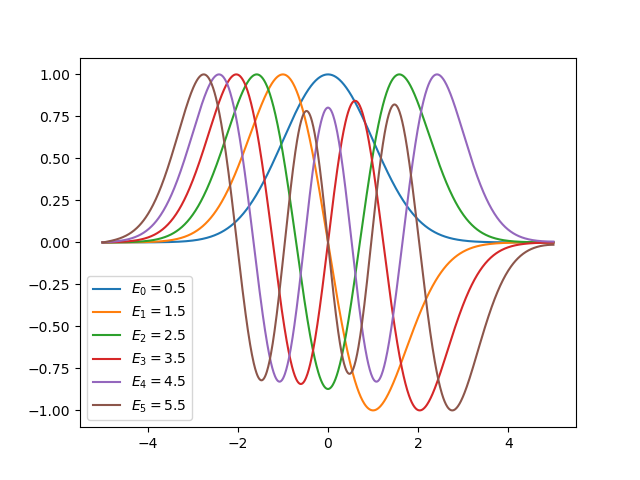

In [7]:
def R(x,E):
    return 2*(V(x)-E)

def Numerov(space,E):
    psi = np.zeros_like(space)
    psi[0] = 0
    psi[1] = 1e-5
    
    for i in range(len(space)-1):
        akp1 = 1-h**2/12 * R(space[i+1],E)
        akm1 = 1-h**2/12 * R(space[i-1],E)
        ak = 1+5*h**2/12 * R(space[i],E)
        if i >= 2:
            psi[i+1] = (2*ak*psi[i] - akm1*psi[i-1])/akp1
    return psi


def EigenEnergy(space,e,step):
    dE = 0.1
    listE = []
    E = e
    while len(listE) < 6:
        psik = Numerov(space,E)[-1]
        psik1 = Numerov(space,E+dE)[-1]
        if psik1*psik < 0:
            listE.append(E)
        E = E+dE
    return listE


E_ = EigenEnergy(x,0,0.001)
Psi = [0]*len(E_)

for i in range(len(E_)):
    Psi[i] = Numerov(x,E_[i])


def Normalize(psi):
    sqrd_psi = psi**2
    a = 1/np.sqrt(sci.integrate.simps(sqrd_psi))
    return a

for k in range(len(Psi)):
    Psi[k] = -Psi[k]/max(-Psi[k])
l = np.linspace(-3.5,3.5)
for i in range(len(E_)):
    plt.plot(x,Psi[i],label=r"$E_{%s} = %s$"%(i,round(E_[i],3)))
plt.legend()

---

**(i). Potencial gausiano:** con lo aprendido anteriormente, encuentre los primeros cinco estados ligados $(E_n <0)$ y los estados propios del operador de energía usando el potencial:
$$V(x) = -10e^{-x^2/20} \text{ con } -\infty < x < \infty.$$

$$E_n = [-9.51,-8.54,-7.62,-6.74,-5.89]$$

In [8]:
# Definición de una rutina para encontrar los valores propios de energía.

def Look4EigenEnergies(space,e,step):
    pass


x = np.linspace(-10,10,N)
def V(x):
    return -10*np.exp(-x**2/20)

EigenEnergy(x,-20,0.001)

[-9.09999999999997,
 -7.199999999999976,
 -5.599999999999982,
 -3.999999999999987,
 -2.699999999999986,
 -1.599999999999985]

---

**(j). Potencial racional:** Encuentre los dos estados ligados $(E_n <0)$ y los estados propios del operador de energía usando el potencial:

$$V(x) = \frac{4}{(1 + x^{2})^{2}} \ \text{ con } \ -\infty < x < \infty.$$

$$E_n = [−1.478, −0.163]$$

**2. Satellite:** Se realiza un lanzamiento de un satélite de comunicaciones desde el polo norte. Debido a un mal cálculo de estudiantes que no vieron el curso de métodos 2, el satélite cayó a los $2200$ s del lanzamiento en la ciudad de Bogotá, ciudad que se localiza en la posición $\vec{r}_{B} = (1, \ 3.0717794)$ (Demasiado aproximada). La tierra no rota de modo que el
movimiento se da a lo largo de un solo meridiano.

---

**(a).** Encuentre la magnitud de la velocidad y en ángulo de lanzamiento usando $\verb|fsolve|$ y la rutina realizada en la clase.